In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, AveragePooling2D

In [2]:
# Loading dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Normalizing dataset
train_X = train_X/255
test_X = test_X/255
train_X.shape

(60000, 28, 28)

In [3]:
# One hot encoding Y 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

train_Y = one_hot(train_y).T
test_Y = one_hot(test_y).T

LeNet-5 architecture is a very efficient convolutional neural network for handwritten character recognition. 
Here is the model:

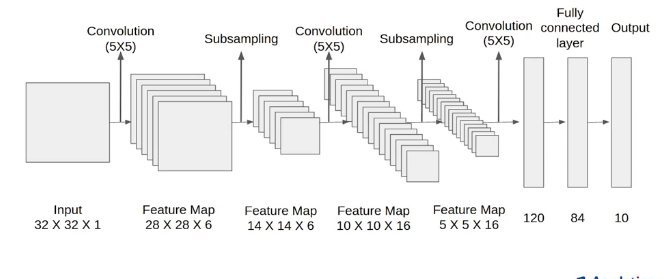

In [5]:
# Creating LeNet model
model = keras.Sequential()
model.add(Conv2D(6, (5, 5), activation='linear', strides=1, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=2, strides=2))
model.add(Conv2D(16, (5, 5), activation='linear', strides=1))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(84))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 activation (Activation)     (None, 24, 24, 6)         0         
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                      

In [7]:
# Selecting batch size and training the model
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_Y)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_Y)).batch(64)
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 18s 15ms/step - loss: 0.2082 - accuracy: 0.9386 - val_loss: 0.0699 - val_accuracy: 0.9798
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0729 - accuracy: 0.9781 - val_loss: 0.0547 - val_accuracy: 0.9822
Epoch 3/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0511 - val_accuracy: 0.9815
Epoch 4/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0462 - accuracy: 0.9863 - val_loss: 0.0506 - val_accuracy: 0.9817
Epoch 5/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0491 - val_accuracy: 0.9836
Epoch 6/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.0510 - val_accuracy: 0.9840
Epoch 7/10
938/938 [==============================] - 14s 15ms/step - loss: 0.0312 - accuracy: 0.9902 - val_loss: 0.0471 - val_accuracy:

In [8]:
history.history

{'loss': [0.2081817239522934,
  0.07288138568401337,
  0.05600415915250778,
  0.046242643147706985,
  0.039896272122859955,
  0.03475935012102127,
  0.03123241849243641,
  0.02923543006181717,
  0.026471419259905815,
  0.024537082761526108],
 'accuracy': [0.9385666847229004,
  0.9781333208084106,
  0.9831833243370056,
  0.9862833619117737,
  0.987933337688446,
  0.9900166392326355,
  0.9902333617210388,
  0.9905999898910522,
  0.9915833473205566,
  0.9922666549682617],
 'val_loss': [0.069936603307724,
  0.0547495000064373,
  0.051127396523952484,
  0.05056551843881607,
  0.04906661808490753,
  0.0509997121989727,
  0.047111522406339645,
  0.04550518840551376,
  0.04833211749792099,
  0.047342583537101746],
 'val_accuracy': [0.9797999858856201,
  0.982200026512146,
  0.9815000295639038,
  0.9817000031471252,
  0.9836000204086304,
  0.984000027179718,
  0.9854999780654907,
  0.9866999983787537,
  0.9855999946594238,
  0.986299991607666]}

C:\Users\rasul\AppData\Local\Temp\ipykernel_11556\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\rasul\AppData\Local\Temp\ipykernel_11556\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

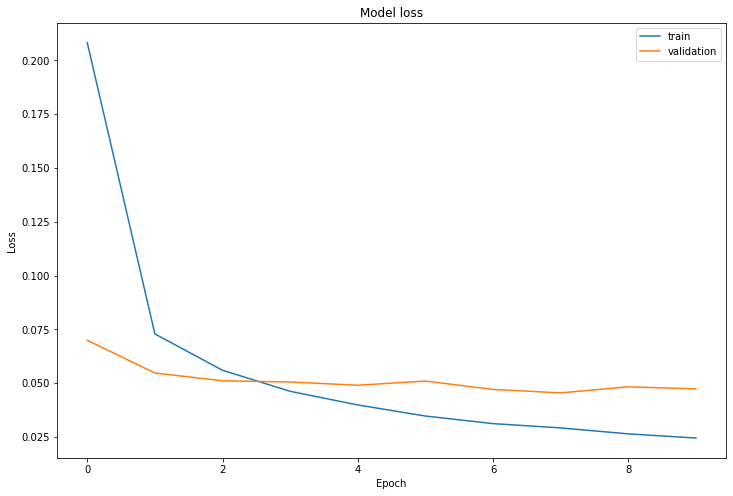

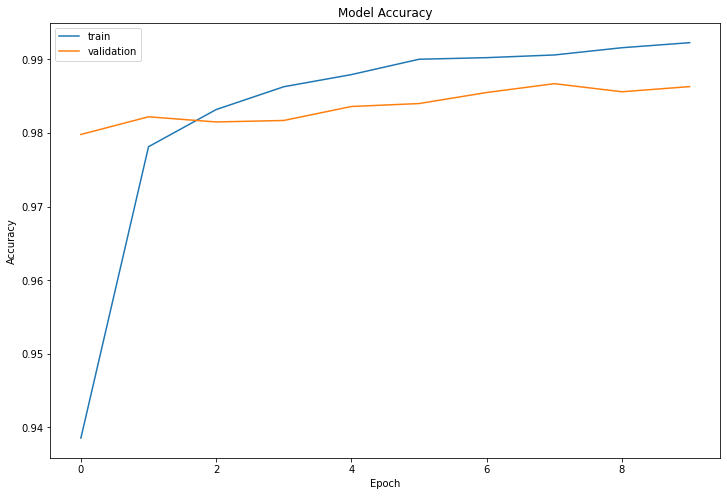

In [9]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [10]:
# Creating list of predictions
predict = model.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [18]:
# Comparing predictions with actual values
def give_num(lst):
    return np.argmax(lst)

i = 666
print("Actual value: ", give_num(test_Y[i]), "\nPredicted value: ", give_num(predict[i]))

Actual value:  7 
Predicted value:  7
